### Zadanie 1

Wykorzystaj zbiór danych [Heart Disease](https://archive.ics.uci.edu/dataset/45/heart+disease), a następnie:
* 1.1 Sprawdź w opisie zbioru danych (data card), które cechy są cechami numerycznymi, a które kategorialnymi. Sprawdź w jaki sposób biblioteka pandas domyślnie wczytuje te dane. Jeżeli w ramce cecha kategorialna jest oznaczona jako numeryczna to zamień ją na kategorialną (pandas posiada typ danych `category`).
* 1.2 Sprawdź czy w zbiorze występują wartości brakujące. Jeżeli tak, to przed wykonaniem kolejnych zadań przygotuj podzbiór danych, który nie będzie zawierał obserwacji z wartościami brakującymi.

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
heart_disease = pd.read_csv("data.csv")
df = pd.DataFrame(heart_disease)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [19]:
df['sex'] = df['sex'].replace({1: 'Male', 0: 'Female'})
df['sex'] = df['sex'].astype('category')

df['cp'] = df['cp'].replace({1: 'typical angina', 2: 'atypical angina', 3:'non-anginal pain', 4: 'asymptomatic'})
df['cp'] = df['cp'].astype('category')

df['fbs'] = df['fbs'].replace({1: 'True', 0: 'False'})
df['fbs'] = df['fbs'].astype('category')

df['restecg'] = df['restecg'].replace({0: 'normal', 1: 'abnormal', 2: 'ventricular hypertrophy'})
df['restecg'] = df['restecg'].astype('category')

df['exang'] = df['exang'].replace({1: 'yes', 0: 'no'})
df['exang'] = df['exang'].astype('category')

df['slope'] = df['slope'].replace({1: 'upsloping', 2: 'flat', 3: 'downsloping'})
df['slope'] = df['slope'].astype('category')

df['thal'] = df['thal'].replace({3: 'normal', 6: 'fixed defect', 7: 'reversable defect'})
df['thal'] = df['thal'].astype('category')

In [29]:
df.dtypes

age            int64
sex         category
cp          category
trestbps       int64
chol           int64
fbs         category
restecg     category
thalach        int64
exang       category
oldpeak      float64
slope       category
ca           float64
thal        category
num            int64
dtype: object

In [21]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64

In [27]:
df_cleaned = df.dropna()
df_cleaned.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

### Zadanie 2

Dla zbioru danych z zadania 1 oblicz i wyświetl:


#### 2.1 Rozkład wartości w kolumnie `num` (Target) - czy dane są zbalansowane? Wyświetl je na wykresie kołowym.

In [33]:
distribution = df_cleaned['num'].value_counts()
distribution

num
0    160
1     54
2     35
3     35
4     13
Name: count, dtype: int64

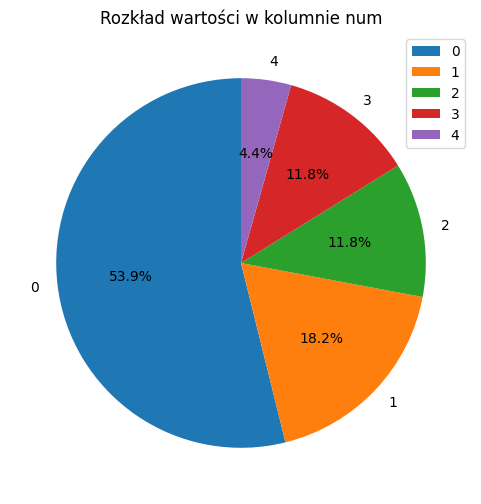

In [34]:
plt.figure(figsize=(6, 6))
distribution.plot.pie(autopct='%1.1f%%', startangle=90, legend=True)
plt.title('Rozkład wartości w kolumnie num')
plt.ylabel('')
plt.show()

#### 2.2 Podstawową statystykę opisową dla każdej cechy numerycznej (min, max, średnia, mediana, odchylenie standardowe, wartość kwantyli 25, 50 oraz 75).

In [35]:
df_cleaned.describe()

,age,trestbps,chol,thalach,oldpeak,ca,num
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,131.693603,247.350168,149.599327,1.055556,0.676768,0.946128
std,9.049736,17.762806,51.997583,22.941562,1.166123,0.938965,1.234551
min,29.000000,94.000000,126.000000,71.000000,0.000000,0.000000,0.000000
25%,48.000000,120.000000,211.000000,133.000000,0.000000,0.000000,0.000000
50%,56.000000,130.000000,243.000000,153.000000,0.800000,0.000000,0.000000
75%,61.000000,140.000000,276.000000,166.000000,1.600000,1.000000,2.000000
max,77.000000,200.000000,564.000000,202.000000,6.200000,3.000000,4.000000


#### 2.3 Dominantę (modę) dla każdej cechy kategorialnej.

In [42]:
df_category = df.select_dtypes(include='category')
df_category.mode()

,sex,cp,fbs,restecg,exang,slope,thal
0,Male,asymptomatic,False,normal,no,upsloping,normal


#### 2.4 Wyświetl macierz korelacji Pearsona dla każdej cechy numerycznej zbioru. Wyświetl ją również na wykresie typu mapa cieplna z wykorzystaniem biblioteki seaborn.

In [43]:
df_numeric = df.select_dtypes(include='number')
correlation_matrix = df_numeric.corr()
correlation_matrix

,age,trestbps,chol,thalach,oldpeak,ca,num
age,1.000000,0.284946,0.208950,-0.393806,0.203805,0.362605,0.222853
trestbps,0.284946,1.000000,0.130120,-0.045351,0.189171,0.098773,0.157754
chol,0.208950,0.130120,1.000000,-0.003432,0.046564,0.119000,0.070909
thalach,-0.393806,-0.045351,-0.003432,1.000000,-0.343085,-0.264246,-0.415040
oldpeak,0.203805,0.189171,0.046564,-0.343085,1.000000,0.295832,0.504092
ca,0.362605,0.098773,0.119000,-0.264246,0.295832,1.000000,0.518909
num,0.222853,0.157754,0.070909,-0.415040,0.504092,0.518909,1.000000


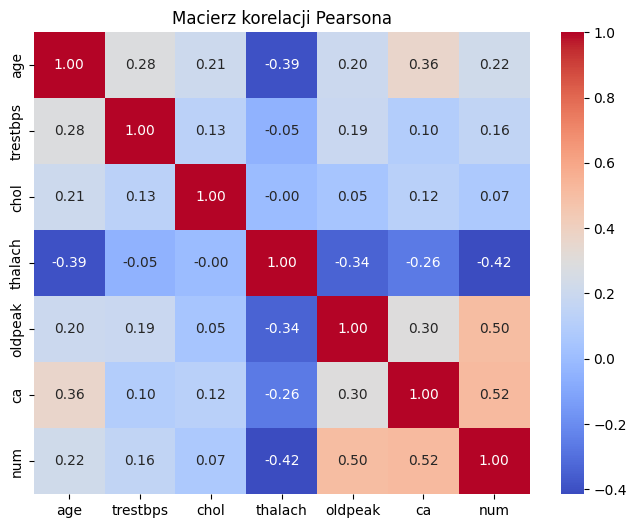

In [45]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Macierz korelacji Pearsona')
plt.show()

#### 2.5 Z macierzy korelacji wyświetl nazwy trzech najbardziej skorelowanych cech względem cechy `age` (bezwzględna wartość z korelacji, bez uwzględniania samej cechy `age` w wynikach, która jak wiemy będzie skorelowana sama do siebie w stopniu równym 1).

In [46]:
correlation_with_age = correlation_matrix['age'].drop('age')  # Usuwamy 'age', bo jest zawsze skorelowana z samą sobą
correlation_with_age.abs().sort_values(ascending=False).head(3)

thalach     0.393806
ca          0.362605
trestbps    0.284946
Name: age, dtype: float64

#### Zadanie 3

Do wykonania poniższych poleceń wykorzystaj zbiór [Adult](https://archive.ics.uci.edu/dataset/2/adult). W tym zbiorze również ustaw typy kategorialne dla odpowiednich kolumn zgodnie z opisem zbioru danych.

* 3.1 Na podstawie zbioru bazowego przygotuj dwa podzbiory danych:

  * zbior_1 - losowe 20% wartości ze zbioru oryginalnego (próbkowanie bez uwzględnienia rozkładu dla cechy opisowej - target)
  * zbior_2 - pozostałe 80% wartości bez elementów ze zbioru_1
  * zbior_3 - losowe 20% wartości ze zbioru oryginalnego (próbkowanie z uwzględnieniem rozkładu cechy opisowej)


Następnie porównaj średnią wartość cechy `capital-loss` dla każdej z prób. Jakie jest prawdopodobieństwo, że te próby pochodzą z tej samej populacji?



In [48]:
df = pd.read_csv("adult_data.csv")
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object

In [49]:
categorical_columns = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'income']
for col in categorical_columns:
    df[col] = df[col].astype('category')
df.dtypes

age                  int64
workclass         category
fnlwgt               int64
education         category
education-num        int64
marital-status    category
occupation        category
relationship      category
race              category
sex               category
capital-gain         int64
capital-loss         int64
hours-per-week       int64
native-country    category
income            category
dtype: object

In [52]:
df_1 = df.sample(frac=0.2, random_state=42)

df_2 = df.drop(df_1.index)

df_3 = df.groupby('income', observed=False, group_keys=False).apply(lambda x: x.sample(frac=0.2, random_state=42), include_groups=False)

In [57]:
print("Średnia dla zbioru 1:", df_1['capital-loss'].mean())
print("Średnia dla zbioru 2:", df_2['capital-loss'].mean())
print("Średnia dla zbioru 3:", df_3['capital-loss'].mean())

Średnia dla zbioru 1: 87.37592109738125
Średnia dla zbioru 2: 87.37997392585875
Średnia dla zbioru 3: 85.23412698412699


#### 3.2 Wykonaj test t dla prób zależnych dla wartości cechy `capital-gain` przyjmując następującą hipotezę zerową: średnia wartość tej cechy dla `race`='White' jest istotnie wyższa niż dla pozostałych wartości cechy `race`. Przyjmij lub odrzuć przyjętą hipotezę.

In [58]:
from scipy import stats

In [59]:
white_race = df[df['race'] == 'White']['capital-gain']

non_white_race = df[df['race'] != 'White']['capital-gain']

t_stat, p_value = stats.ttest_ind(white_race, non_white_race)

print("Statystyka t:", t_stat)
print("Wartość p:", p_value)

if p_value < 0.05:
    print("Odrzucamy hipotezę zerową: Istnieje istotna różnica.")
else:
    print("Nie odrzucamy hipotezy zerowej: Brak istotnej różnicy.")

Statystyka t: 2.619809298752372
Wartość p: 0.008800907707312015
Odrzucamy hipotezę zerową: Istnieje istotna różnica.


#### 3.3 Wykorzystując test ANOVA sprawdź jak istotna statystycznie jest różnica średniej wartości cechy `capital-gain` dla każdej z wartości `race` z osobna. Wskaż `p-values` dla tego testu. Jak zinterpretować ten wynik?

In [60]:
f_stat, p_value_anova = stats.f_oneway(
    df[df['race'] == 'White']['capital-gain'],
    df[df['race'] == 'Asian-Pac-Islander']['capital-gain'],
    df[df['race'] == 'Amer-Indian-Eskimo']['capital-gain'],
    df[df['race'] == 'Other']['capital-gain'],
    df[df['race'] == 'Black']['capital-gain']
)

print("Statystyka F:", f_stat)
print("Wartość p (ANOVA):", p_value_anova)

if p_value_anova < 0.05:
    print("Odrzucamy hipotezę zerową: Istnieje istotna różnica między grupami.")
else:
    print("Nie odrzucamy hipotezy zerowej: Brak istotnej różnicy między grupami.")

Statystyka F: 7.094807694142305
Wartość p (ANOVA): 1.0490498162006652e-05
Odrzucamy hipotezę zerową: Istnieje istotna różnica między grupami.


#### Zadanie 4

Wykonaj test Chi square dla wartości cechy `income` dla dwóch grup:
* ludzie w wieku < 40 lat
* ludzie w wieku >= 40 lat

Wyświetl wyniki tego testu.

In [71]:
from scipy.stats import chi2_contingency

df['age_group'] = df['age'].apply(lambda x: '<40' if x < 40 else '>=40')

contingency_table = pd.crosstab(df['age_group'], df['income'])

chi2, p, dof, expected = chi2_contingency(contingency_table)

print("\nWyniki testu Chi-kwadrat:")
print(f"Statystyka chi2: {chi2:.4f}")
print(f"Wartość p: {p:.4f}")
print(f"Liczba stopni swobody: {dof}")


Wyniki testu Chi-kwadrat:
Statystyka chi2: 2294.3015
Wartość p: 0.0000
Liczba stopni swobody: 3


In [66]:
contingency_table

income,<=50K,<=50K.,>50K,>50K.
age_group,,,,
<40,15504,5517,2820,990
>=40,9216,3320,5021,1716


In [70]:
expected

array([[13917.61110103,  4975.32076456,  4414.56264738,  1523.50548703],
       [10802.38889897,  3861.67923544,  3426.43735262,  1182.49451297]])